---
title: I built a Pikachu classifer because there's like 8 of them.
# toc: false
style: border #fill, border
color: success #primary / secondary / success / danger / warning / info / light / dark (choose one only)
image: https://remnote-user-data.s3.amazonaws.com/x4aWaP4M69AxYfnmxF0EqJvbd2S-ZLwct9l6DkN5x-QO5pwQW3LhUbLsXO7b5WVtrB4Z4G2nnMp03JW1HzwqFFiwZMp7DT1nP8HQrMcSpWohVhjSTzO3E3De7ulKOubv.gif
categories:
  - Portfolio
tags: 
  - FastAI
  - CNN
  - Machine Learning
published: true
---

# Environment Setup (required)

In [ ]:
# type the following to make any cell get skipped during a "Run All"
# %%skip True
def skip(line, cell=None):
    '''Skips execution of the current line/cell if line evaluates to True.'''
    if eval(line):
        return

    get_ipython().run_cell(cell)

def load_ipython_extension(shell):
    '''Registers the skip magic when the extension loads.'''
    shell.register_magic_function(skip, 'line_cell')

def unload_ipython_extension(shell):
    '''Unregisters the skip magic when the extension unloads.'''
    del shell.magics_manager.magics['cell']['skip']
    
    
load_ipython_extension(get_ipython())

install fastai

In [ ]:
! [ -e /content ] && pip install -Uqq fastai --upgrade

In [ ]:
import fastai
print(fastai.__version__) # should show >=2.0, not 1.0.61

2.5.3


install imagemagick

In [ ]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
imagemagick is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.12).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


import libraries

In [ ]:
from fastai.vision.all import *
import fastai.vision.widgets as fastwidgets
from ipywidgets import widgets as iwidgets
from pandas.api.types import CategoricalDtype
import matplotlib as mpl
import graphviz
import math   
#from google.colab import widgets

Set up data directory (including Drive)

In [ ]:
import os
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
DATADIR = os.path.join(MOUNTPOINT, 'My Drive', 'Colab Data', 'Pikachu Classifier')
drive.mount(MOUNTPOINT)

Mounted at /content/gdrive


In [ ]:
path = Path(DATADIR)
if not path.exists():
    os.makedirs(path)
os.chdir(path)

os.getcwd()

'/content/gdrive/My Drive/Colab Data/Pikachu Classifier'

Set up image search

In [ ]:
bingApiKey = '4a19d080f5b24133ac280f96334932fa'

In [ ]:
def search_images_bing(key, term, min_sz=128, max_images=150):    
     params = {'q':term, 'count':max_images, 'min_height':min_sz, 'min_width':min_sz}
     headers = {"Ocp-Apim-Subscription-Key":key}
     search_url = "https://api.bing.microsoft.com/v7.0/images/search"
     response = requests.get(search_url, headers=headers, params=params)
     response.raise_for_status()
     search_results = response.json()    
     return L(search_results['value'])

In [ ]:
def remove_failed_downloads(path):
  fns = get_image_files(path) #get filenames
  failed = verify_images(fns) #find corrupted/failed files
  failed.map(Path.unlink)     #remove those files

In [ ]:
#sets a transparent background to white for all images
def remove_transparent_bg(path): 
  %cd $path
  ! mogrify -background white -alpha remove -alpha off

# Test run of image downloading code (optional)

In [ ]:

#@markdown Skip this section (Yes/No)
skip_section = True #@param {type:"boolean"}


In [ ]:
%%skip skip_section
results = search_images_bing(bingApiKey, 'minun pokemon', max_images=10) # returns a list of image urls, among other things
urls = results.attrgot('contentUrl') #get the array of the URLs
len(urls), urls[0] #should show {max_images}, for {max_images} retrieved URLs

In [ ]:
%%skip skip_section
path = os.path.join(DATADIR,"pokemon") #folder for all pokemon
dest = Path(os.path.join(path,"minun")) #subfolder for just this one
#create the data path if needed
if not Path(dest).exists():
  os.makedirs(dest)

In [ ]:
%%skip skip_section
download_images(dest, urls=urls, n_workers=0)
len(os.listdir(path)) #how many images did we download? (this may be less than {max_images} due to some urls being invalid)

In [ ]:
%%skip skip_section
#what does the first image in this class' folder look like?
id = os.listdir(Path(path))[0]
im = Image.open(os.path.join(path, id))
im.to_thumb(128,128)

working ok? Now let's download our pokemon for real.

In [ ]:
#delete our test batch


# Setting up the data (required)

Download the image dataset

,,
,,
,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

pikachu
DL'd Images:  135


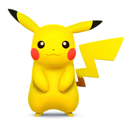

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

mimikyu
DL'd Images:  142


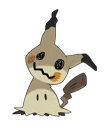

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

plusle -minun
DL'd Images:  144


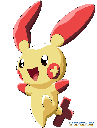

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

minun -plusle
DL'd Images:  145


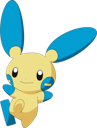

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

dedenne
DL'd Images:  147


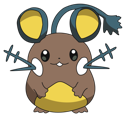

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

togedemaru
DL'd Images:  148


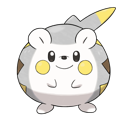

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

morpeko
DL'd Images:  134


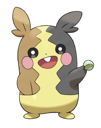

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

emolga
DL'd Images:  139


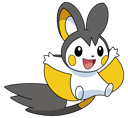

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

pachirisu
DL'd Images:  144


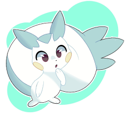

<IPython.core.display.Javascript object>

In [ ]:
pokemon_list = ['pikachu','mimikyu',
                'plusle -minun', #adding the minus operator to exclude images 
                'minun -plusle', #of both together, since they're so common
                'dedenne', 'togedemaru', 
                'morpeko', 'emolga', 'pachirisu']
num_images = 50
path = os.path.join(DATADIR,"pokemon")
if not Path(path).exists():
  os.makedirs(path)

grid = widgets.Grid(3, 3)


for i, o in enumerate(pokemon_list):
  dest = Path(os.path.join(path,o))
  if not dest.exists(): ## skips existing datasets that are already DL'd
    dest.mkdir(exist_ok=True)
    results = search_images_bing(bingApiKey, f'{o} pokemon')
    urls = results.attrgot('contentUrl')
    download_images(dest, urls=results.attrgot('contentUrl'), max_pics=num_images, n_workers=0)
    remove_failed_downloads(dest)
    remove_transparent_bg(dest)
  with grid.output_to(i%3,math.floor(i/3)):
    print(o)
    print("DL'd Images: ", len(os.listdir(dest)))
    exampleimg = os.path.join(dest, os.listdir(Path(dest))[0])
    display(Image.open(exampleimg).to_thumb(128,128))
    print()


Setting up data objects

In [ ]:
#setting up the datablock, this will act as a unified 'template'
#for our dataloaders for each pokemon.
pokemonBlock = DataBlock(
	blocks=(ImageBlock, CategoryBlock),    	
	get_items=get_image_files,    
	splitter=RandomSplitter(valid_pct=0.2, seed=42),    
	get_y=parent_label,    
	item_tfms=RandomResizedCrop(224, min_scale=0.5), #randomly crop the image on each Epoch
  batch_tfms=aug_transforms()# Utility func to flip, rotate, zoom, warp,etc. the images
 )

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


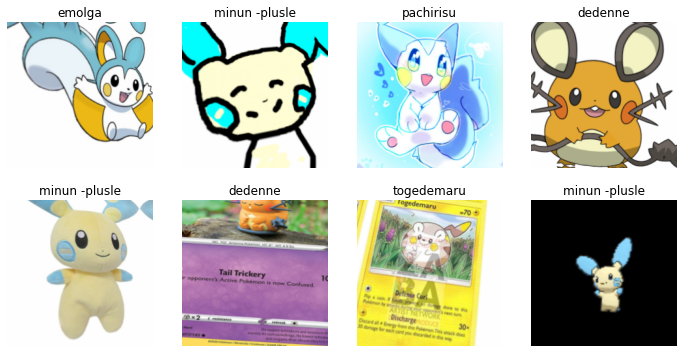

In [ ]:
#setting up our dataloaders
dls = pokemonBlock.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2) #show me some data

# Build our model (required)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.586856,0.741542,0.247059,05:58


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.869628,0.499887,0.164706,00:28
1,0.676326,0.334388,0.098039,00:28
2,0.511067,0.290011,0.113725,00:28
3,0.410448,0.282395,0.109804,00:28


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


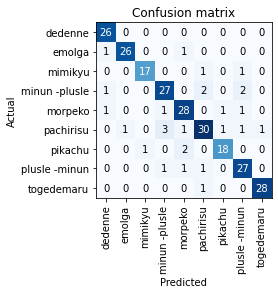

In [ ]:
#graph how well it's doing (confusion matrix)
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
#save our model
learn.export("pikachu_classifier")

# Clean the data (optional)

In [ ]:

#@markdown Skip this section (Yes/No)
skip_section = True #@param {type:"boolean"}



In [ ]:
%%skip skip_section
cleaner = fastwidgets.ImageClassifierCleaner(learn)
cleaner

In [ ]:
%%skip skip_section
#move all the data we re-labeled to the proper folder
for idx,cat in cleaner.change(): 
  shutil.move(str(cleaner.fns[idx]), Path(os.path.join(path, cat)))

In [ ]:
%%skip skip_section
#move all the data we labeled as deleted to a "deleted" folder
dest = os.path.join(Path(path).parent,"deleted")
if not Path(dest).exists():
  os.makedirs(dest)
for idx in cleaner.delete(): 
  shutil.move(str(cleaner.fns[idx]), dest) #*
  #*or use this to simply delete them: 
  # cleaner.fns[idx].unlink() 
  # and you can always delete the full folder later using 
  # shutil.rmtree(dest)

In [ ]:
#DONE! :)

In [ ]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix

# Testing It Out

In [ ]:
#@markdown Enable this to use the .pkl file exported by the model. Leave it unchecked to use the model you just trained.
use_existing_model = True #@param {type:"boolean"}

if(use_existing_model):
  learn = load_learner("pikachu_classifier")

In [ ]:
!pip install ipywebrtc    


In [ ]:
import requests
from io import BytesIO  

In [ ]:
def on_new_image_upload(change):
  img = PILImage.create(btn_upload.data[-1])    
  img_display.from_file(img)
  on_new_image(img)
def on_new_image_webcam(change):
  #camera.close()
  #image_recorder.close()
  img = (image_recorder.image.value)  #PILImage.create(btn_upload.data[-1])    
  img_display.value = (img) #img_display.from_file(img)
  on_new_image(img)
def on_new_image(img):    
  out_pl.clear_output()
  img_display.layout.visibility = 'visible'
  img_display.layout.height = 640
  with out_pl:  
    pred,pred_idx,probs = learn.predict(img)    
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [ ]:
from ipywebrtc import CameraStream, ImageRecorder
from google.colab import output
output.enable_custom_widget_manager()

camera = CameraStream(constraints=
                      {'facing_mode': 'user',
                       'audio': False,
                       'video': { 'width': 640, 'height': 480 }
                       })
image_recorder = ImageRecorder(stream=camera)
image_recorder.image.observe(on_new_image_webcam, names=['value'])

def take_photo(change):
  img_display.layout.visibility = 'hidden'
  img_display.layout.height = 1
  with out_pl:
    display(iwidgets.VBox([camera, image_recorder]))
  

In [ ]:
btn_upload = iwidgets.FileUpload(multiple=False)
btn_upload.observe(on_new_image_upload, names='_counter')
btn_camera = iwidgets.Button(description="Camera")
btn_camera.on_click(take_photo)
out_pl = iwidgets.Output()
response = requests.get("https://cdn.vox-cdn.com/uploads/chorus_image/image/53254027/who_pokemon.0.jpg")
img = Image.open(BytesIO(response.content)).to_bytes_format() ##TODO fix namespace conflict for "Image" between PIL and something else...
img_display = iwidgets.Image(
    value=img,
    format='png',
    width=640,
    height=480
)
lbl_pred = iwidgets.Label()

AttributeError: ignored

In [ ]:
iwidgets.VBox([
  iwidgets.Label('Select your \'mon!'),
  img_display,
  out_pl,
  iwidgets.HBox([btn_camera, btn_upload]), 
  lbl_pred
]) 

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

take_photo() missing 1 required positional argument: 'change'
